<a href="https://colab.research.google.com/github/Sreejan09/ML---Assignment---2/blob/master/task_2_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os


In [5]:
# checking for whether image is present or not
if os.path.exists('benz.jpg'):
    print('Benz always exist')
else :
    print("World doesn't exist")

World doesn't exist


In [6]:
try:
    import torchvision
except ImportError:
    %pip install torchvision
    import torchvision
    # %pip install torchvision --quiet

In [8]:
# read a image from torch vision
img = torchvision.io.read_image('benz.jpg')
print(img.shape)

torch.Size([3, 2401, 3600])


In [9]:

try :
    from einops import rearrange
except:
    %pip install einops
    from einops import rearrange


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 734.7 kB/s eta 0:00:00


In [10]:
# pip install --force-reinstall numpy


In [11]:
# pip install --force-reinstall matplotlib --quiet


In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


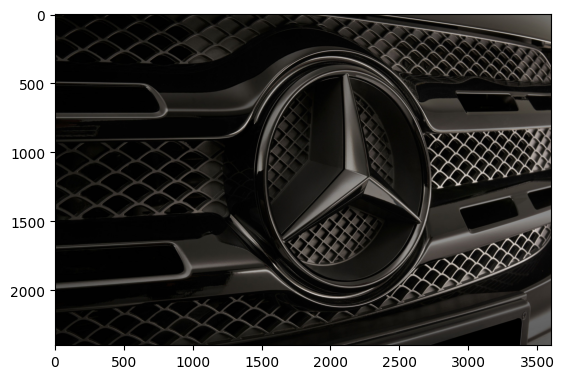

In [13]:
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())


In [14]:
try :
    from sklearn import preprocessing
except :
    %pip install scikit-learn --quiet
    from sklearn import preprocessing


In [15]:
from sklearn import preprocessing

scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(1, -1))
scaler_img

MinMaxScaler()

In [16]:
img

tensor([[[  5,   5,   4,  ..., 112, 112, 112],
         [  5,   5,   5,  ..., 112, 112, 112],
         [  5,   5,   5,  ..., 112, 112, 112],
         ...,
         [  1,   1,   1,  ...,  89,  89,  89],
         [  1,   1,   1,  ...,  88,  88,  88],
         [  1,   1,   1,  ...,  89,  89,  89]],

        [[  5,   5,   4,  ..., 111, 111, 111],
         [  5,   5,   5,  ..., 111, 111, 111],
         [  5,   5,   5,  ..., 111, 111, 111],
         ...,
         [  1,   1,   1,  ...,  88,  88,  88],
         [  1,   1,   1,  ...,  87,  87,  87],
         [  1,   1,   1,  ...,  88,  88,  88]],

        [[  3,   3,   2,  ..., 106, 106, 106],
         [  3,   3,   3,  ..., 106, 106, 106],
         [  3,   3,   3,  ..., 106, 106, 106],
         ...,
         [  1,   1,   1,  ...,  86,  86,  86],
         [  1,   1,   1,  ...,  85,  85,  85],
         [  1,   1,   1,  ...,  86,  86,  86]]], dtype=torch.uint8)

In [17]:
from sklearn import preprocessing

# Assuming img is your input image array

# Reshape the image data to be a 2D array where each row is a pixel value
img_reshaped = img.reshape(-1, 1)

# Fit the scaler on the reshaped image
scaler_img = preprocessing.MinMaxScaler()
scaler_img.fit(img_reshaped)

# Transform the reshaped image
img_scaled = scaler_img.transform(img_reshaped)

# Reshape the scaled image back to the original shape
img_scaled = img_scaled.reshape(img.shape)

print(img_scaled.shape)


(3, 2401, 3600)


In [18]:
try:
    import torch
except :
    %pip install torch
    import torch

import torchvision.transforms as transform

In [19]:
try :
    import os
except :
    %pip install os
    import os

os.environ['CUDA_LAUNCH_BLOCKING']='1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
# img_scaled = img_scaled.reshape(img.shape)
print(img_scaled.shape)

(3, 2401, 3600)


In [21]:
img_scaled = torch.tensor(img_scaled)

In [22]:
img_scaled = img_scaled.to(device)

In [23]:
img_scaled

tensor([[[0.0196, 0.0196, 0.0157,  ..., 0.4392, 0.4392, 0.4392],
         [0.0196, 0.0196, 0.0196,  ..., 0.4392, 0.4392, 0.4392],
         [0.0196, 0.0196, 0.0196,  ..., 0.4392, 0.4392, 0.4392],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.3490, 0.3490, 0.3490],
         [0.0039, 0.0039, 0.0039,  ..., 0.3451, 0.3451, 0.3451],
         [0.0039, 0.0039, 0.0039,  ..., 0.3490, 0.3490, 0.3490]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.4353, 0.4353, 0.4353],
         [0.0196, 0.0196, 0.0196,  ..., 0.4353, 0.4353, 0.4353],
         [0.0196, 0.0196, 0.0196,  ..., 0.4353, 0.4353, 0.4353],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.3451, 0.3451, 0.3451],
         [0.0039, 0.0039, 0.0039,  ..., 0.3412, 0.3412, 0.3412],
         [0.0039, 0.0039, 0.0039,  ..., 0.3451, 0.3451, 0.3451]],

        [[0.0118, 0.0118, 0.0078,  ..., 0.4157, 0.4157, 0.4157],
         [0.0118, 0.0118, 0.0118,  ..., 0.4157, 0.4157, 0.4157],
         [0.0118, 0.0118, 0.0118,  ..., 0.4157, 0.4157, 0.

In [24]:
crop = torchvision.transforms.functional.crop(img_scaled.cpu(),1000, 2100, 300, 300 )
crop.shape

torch.Size([3, 300, 300])

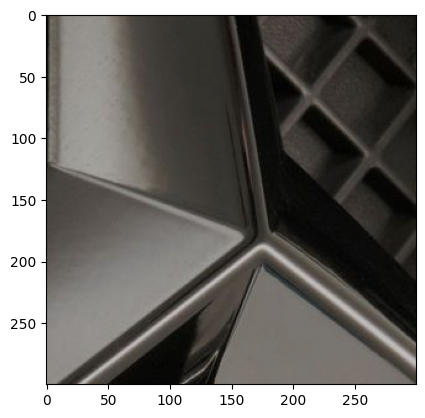

In [25]:
plt.imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())

In [26]:
# what is this line do
crop = crop.to(device)

In [27]:
# getting the dimension of the image tensor
num_channels, height, width = crop.shape
print(num_channels, height, width)

3 300 300


In [28]:
num_channels, height, width = 2, 3, 4


# Create a 2D grid of (x,y) coordinates
w_coords = torch.arange(width).repeat(height, 1)
h_coords = torch.arange(height).repeat(width, 1).t()
w_coords = w_coords.reshape(-1)
h_coords = h_coords.reshape(-1)

# Combine the x and y coordinates into a single tensor
X = torch.stack([h_coords, w_coords], dim=1).float()

In [29]:

X.shape

torch.Size([12, 2])

In [30]:
def create_coordinate_map(img):
    """
    img: torch.Tensor of shape (num_channels, height, width)

    return: tuple of torch.Tensor of shape (height * width, 2) and torch.Tensor of shape (height * width, num_channels)
    """

    num_channels, height, width = img.shape

    # Create a 2D grid of (x,y) coordinates (h, w)
    # width values change faster than height values
    w_coords = torch.arange(width).repeat(height, 1)
    h_coords = torch.arange(height).repeat(width, 1).t()
    w_coords = w_coords.reshape(-1)
    h_coords = h_coords.reshape(-1)

    # Combine the x and y coordinates into a single tensor
    X = torch.stack([h_coords, w_coords], dim=1).float()

    # Move X to GPU if available
    X = X.to(device)

    # Reshape the image to (h * w, num_channels)
    Y = rearrange(img, 'c h w -> (h w) c').float()
    return X, Y

In [31]:
benz_X, benz_Y = create_coordinate_map(crop)

benz_X.shape, benz_Y.shape

(torch.Size([90000, 2]), torch.Size([90000, 3]))

In [32]:
scaler_X = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(benz_X.cpu())

# Scale the X coordinates
benz_X_scaled = scaler_X.transform(benz_X.cpu())

# Move the scaled X coordinates to the GPU
benz_X_scaled = torch.tensor(benz_X_scaled).to(device)

# Set to dtype float32
benz_X_scaled = benz_X_scaled.float()

In [33]:
try :
    import torch.nn as nn
except :
    %pip install torch
    import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

In [34]:

net = LinearModel(2, 3)
net.to(device)

LinearModel(
  (linear): Linear(in_features=2, out_features=3, bias=True)
)

In [35]:
def train(net, lr, X, Y, epochs, verbose=True):
    """
    net: torch.nn.Module
    lr: float
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    """

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = net(X)


        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch} loss: {loss.item():.6f}")
    return loss.item()

In [36]:

train(net, 0.01, benz_X_scaled, benz_Y, 1000)

Epoch 0 loss: 0.377675
Epoch 100 loss: 0.023978
Epoch 200 loss: 0.022105
Epoch 300 loss: 0.022105
Epoch 400 loss: 0.022105
Epoch 500 loss: 0.022105
Epoch 600 loss: 0.022105
Epoch 700 loss: 0.022105
Epoch 800 loss: 0.022105
Epoch 900 loss: 0.022105


0.022105341777205467

In [37]:
import matplotlib.gridspec as gridspec
def plot_reconstructed_and_original_image(original_img, net, X, title=""):
    """
    net: torch.nn.Module
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    """
    num_channels, height, width = original_img.shape
    net.eval()
    with torch.no_grad():
        outputs = net(X)
        outputs = outputs.reshape(height, width, num_channels)
        #outputs = outputs.permute(1, 2, 0)
    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.imshow(outputs.cpu())
    ax0.set_title("Reconstructed Image")


    ax1.imshow(original_img.cpu().permute(1, 2, 0))
    ax1.set_title("Original Image")

    for a in [ax0, ax1]:
        a.axis("off")


    fig.suptitle(title, y=0.9)
    plt.tight_layout()

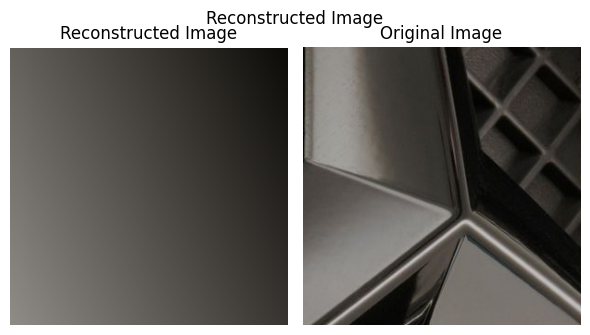

In [38]:
plot_reconstructed_and_original_image(crop, net, benz_X_scaled, title="Reconstructed Image")

In [39]:
# Use polynomial features of degree "d"

def poly_features(X, degree):
    """
    X: torch.Tensor of shape (num_samples, 2)
    degree: int

    return: torch.Tensor of shape (num_samples, degree * (degree + 1) / 2)
    """
    X1 = X[:, 0]
    X2 = X[:, 1]
    X1 = X1.unsqueeze(1)
    X2 = X2.unsqueeze(1)
    X = torch.cat([X1, X2], dim=1)
    poly = preprocessing.PolynomialFeatures(degree=degree)
    X = poly.fit_transform(X.cpu())
    return torch.tensor(X, dtype=torch.float32).to(device)

In [40]:
benz_X_scaled_poly = poly_features(benz_X_scaled, 50)

In [41]:
benz_X_scaled_poly.dtype,benz_X_scaled_poly.shape, benz_Y.shape,benz_Y.dtype

(torch.float32,
 torch.Size([90000, 1326]),
 torch.Size([90000, 3]),
 torch.float32)

In [42]:
net = LinearModel(benz_X_scaled_poly.shape[1], 3)
net.to(device)

train(net, 0.005, benz_X_scaled_poly,benz_Y, 1500)

Epoch 0 loss: 0.115108
Epoch 100 loss: 0.012509
Epoch 200 loss: 0.011229
Epoch 300 loss: 0.010568
Epoch 400 loss: 0.010143
Epoch 500 loss: 0.009890
Epoch 600 loss: 0.009645
Epoch 700 loss: 0.009468
Epoch 800 loss: 0.009348
Epoch 900 loss: 0.009217
Epoch 1000 loss: 0.009102
Epoch 1100 loss: 0.009032
Epoch 1200 loss: 0.008953
Epoch 1300 loss: 0.008864
Epoch 1400 loss: 0.008824


0.008746184408664703

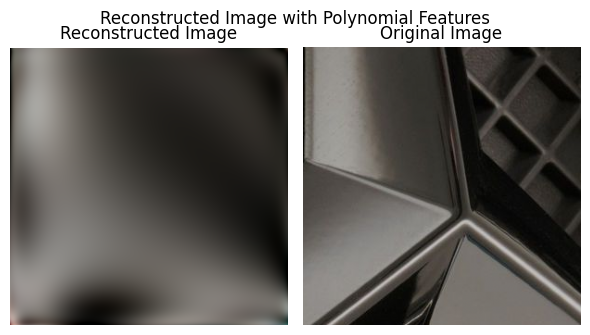

In [43]:
plot_reconstructed_and_original_image(crop, net, benz_X_scaled_poly, title="Reconstructed Image with Polynomial Features")


In [44]:
# create RFF features
def create_rff_features(X, num_features, sigma):
    from sklearn.kernel_approximation import RBFSampler
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2))
    X = X.cpu().numpy()
    X = rff.fit_transform(X)
    return torch.tensor(X, dtype=torch.float32).to(device)

In [45]:
X_rff = create_rff_features(benz_X_scaled, 37500, 0.008)

In [46]:
X_rff.shape

torch.Size([90000, 37500])

In [47]:
net = LinearModel(X_rff.shape[1], 3)
net.to(device)

train(net, 0.005, X_rff, benz_Y, 2500)

Epoch 0 loss: 0.120479
Epoch 100 loss: 0.014079
Epoch 200 loss: 0.007346
Epoch 300 loss: 0.003935
Epoch 400 loss: 0.002137
Epoch 500 loss: 0.001189
Epoch 600 loss: 0.000684
Epoch 700 loss: 0.000410
Epoch 800 loss: 0.000260
Epoch 900 loss: 0.000180
Epoch 1000 loss: 0.000138
Epoch 1100 loss: 0.000116
Epoch 1200 loss: 0.000105
Epoch 1300 loss: 0.000099
Epoch 1400 loss: 0.000097
Epoch 1500 loss: 0.000095
Epoch 1600 loss: 0.000094
Epoch 1700 loss: 0.000093
Epoch 1800 loss: 0.000092
Epoch 1900 loss: 0.000091
Epoch 2000 loss: 0.000091
Epoch 2100 loss: 0.000090
Epoch 2200 loss: 0.000090
Epoch 2300 loss: 0.000090
Epoch 2400 loss: 0.000089


8.887471631169319e-05

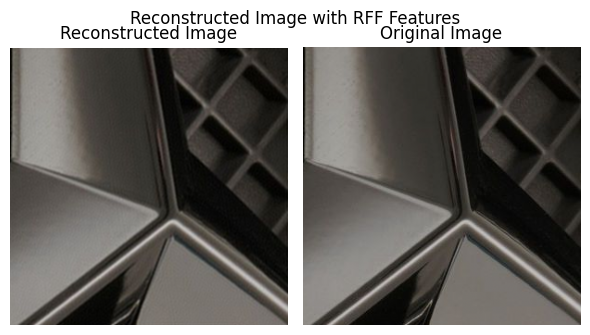

In [48]:
plot_reconstructed_and_original_image(crop, net, X_rff, title="Reconstructed Image with RFF Features")


In [49]:
w = 100
scale=2
torch.arange(0, w, 1/scale)

tensor([ 0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
         4.0000,  4.5000,  5.0000,  5.5000,  6.0000,  6.5000,  7.0000,  7.5000,
         8.0000,  8.5000,  9.0000,  9.5000, 10.0000, 10.5000, 11.0000, 11.5000,
        12.0000, 12.5000, 13.0000, 13.5000, 14.0000, 14.5000, 15.0000, 15.5000,
        16.0000, 16.5000, 17.0000, 17.5000, 18.0000, 18.5000, 19.0000, 19.5000,
        20.0000, 20.5000, 21.0000, 21.5000, 22.0000, 22.5000, 23.0000, 23.5000,
        24.0000, 24.5000, 25.0000, 25.5000, 26.0000, 26.5000, 27.0000, 27.5000,
        28.0000, 28.5000, 29.0000, 29.5000, 30.0000, 30.5000, 31.0000, 31.5000,
        32.0000, 32.5000, 33.0000, 33.5000, 34.0000, 34.5000, 35.0000, 35.5000,
        36.0000, 36.5000, 37.0000, 37.5000, 38.0000, 38.5000, 39.0000, 39.5000,
        40.0000, 40.5000, 41.0000, 41.5000, 42.0000, 42.5000, 43.0000, 43.5000,
        44.0000, 44.5000, 45.0000, 45.5000, 46.0000, 46.5000, 47.0000, 47.5000,
        48.0000, 48.5000, 49.0000, 49.50

In [50]:
def create_coordinate_map(img, scale=1):
    """
    img: torch.Tensor of shape (num_channels, height, width)

    return: tuple of torch.Tensor of shape (height * width, 2) and torch.Tensor of shape (height * width, num_channels)
    """

    num_channels, height, width = img.shape

    # Create a 2D grid of (x,y) coordinates (h, w)
    # width values change faster than height values
    w_coords = torch.arange(0, width,  1/scale).repeat(int(height*scale), 1)
    h_coords = torch.arange(0, height, 1/scale).repeat(int(width*scale), 1).t()
    w_coords = w_coords.reshape(-1)
    h_coords = h_coords.reshape(-1)

    # Combine the x and y coordinates into a single tensor
    X = torch.stack([h_coords, w_coords], dim=1).float()

    # Move X to GPU if available
    X = X.to(device)

    # Reshape the image to (h * w, num_channels)
    Y = rearrange(img, 'c h w -> (h w) c').float()
    return X, Y

In [51]:
create_coordinate_map(crop, scale=2)[0].shape

torch.Size([360000, 2])

In [52]:
create_coordinate_map(crop, scale=1)[0].shape

torch.Size([90000, 2])